## Task 2 - Model Building and Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import mlflow
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.model_utils import *

In [4]:
# Load fraud data
fraud_data = pd.read_csv('../data/processed/processed_fraud_data.csv')
# Load credit card data
credit_data = pd.read_csv('../data/processed/processed_credit_card.csv')

In [5]:
fraud_data.head()

,user_id,purchase_value,device_id,age,ip_address,class,ip_int,hour_of_day,day_of_week,month,...,country_Zambia,country_Zimbabwe,signup_hour,signup_day,signup_year,signup_month,purchase_hour,purchase_day,purchase_year,purchase_month
0,247547,0.549607,KIXYSVCHIPQBR,-0.363124,-1.728724,0,-1.728724,-1.231124,1.487911,0.749993,...,False,False,22,1,2015,2,2,5,2015,4
1,220737,-1.197335,PKYOWQKWGJNJI,0.101168,-1.728666,0,-1.728666,1.229002,-0.505034,-1.500438,...,False,False,20,6,2015,6,1,0,2015,6
2,390400,0.385831,LVCSXLISZHVUO,-0.479197,-1.728664,0,-1.728664,1.663142,0.989675,-0.750295,...,False,False,18,3,2015,1,18,3,2015,1
3,69592,0.986342,UHAUHNXXUADJE,-0.363124,-1.728577,0,-1.728577,0.650149,0.989675,-0.375223,...,False,False,21,1,2015,4,13,0,2015,5
4,174987,0.767974,XPGPMOHIDRMGE,0.449387,-1.728546,0,-1.728546,-1.086411,-1.003270,1.875208,...,False,False,7,1,2015,7,18,2,2015,9


In [6]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0


In [7]:
print(fraud_data.isnull().sum())

user_id           0
purchase_value    0
device_id         0
age               0
ip_address        0
                 ..
signup_month      0
purchase_hour     0
purchase_day      0
purchase_year     0
purchase_month    0
Length: 212, dtype: int64


In [8]:
fraud_data.dtypes

user_id             int64
purchase_value    float64
device_id          object
age               float64
ip_address        float64
                   ...   
signup_month        int64
purchase_hour       int64
purchase_day        int64
purchase_year       int64
purchase_month      int64
Length: 212, dtype: object

In [9]:
fraud_data.columns

Index(['user_id', 'purchase_value', 'device_id', 'age', 'ip_address', 'class',
       'ip_int', 'hour_of_day', 'day_of_week', 'month',
       ...
       'country_Zambia', 'country_Zimbabwe', 'signup_hour', 'signup_day',
       'signup_year', 'signup_month', 'purchase_hour', 'purchase_day',
       'purchase_year', 'purchase_month'],
      dtype='object', length=212)

In [10]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
#Initialize MLflow experiment
mlflow.set_experiment("fraud_detection_comparison")

<Experiment: artifact_location='file:///d:/KIFYA%20AIM/WEEK%208%20AND%209/project/fraud-detection-system/notebooks/mlruns/743817608207788903', creation_time=1729453842785, experiment_id='743817608207788903', last_update_time=1729453842785, lifecycle_stage='active', name='fraud_detection_comparison', tags={}>

In [12]:
# Initialize the modeling class for both datasets
fraud_detector_ecommerce = FraudDetectionModeling(experiment_name="ecommerce_fraud_detection")
fraud_detector_credit = FraudDetectionModeling(experiment_name="credit_fraud_detection")

In [13]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['device_id','age_group']
le = LabelEncoder()
for col in categorical_columns:
    fraud_data[col] = le.fit_transform(fraud_data[col])

### Prepare features and target for both datasets

In [14]:
# For Fraud Data
X_fraud = fraud_data.drop(['class'], axis=1)
y_fraud = fraud_data['class']

In [15]:
print(X_fraud.dtypes)

user_id             int64
purchase_value    float64
device_id           int32
age               float64
ip_address        float64
                   ...   
signup_month        int64
purchase_hour       int64
purchase_day        int64
purchase_year       int64
purchase_month      int64
Length: 211, dtype: object


In [16]:
X_train_fraud_scaled, X_test_fraud_scaled, y_train_fraud, y_test_fraud = \
    fraud_detector_ecommerce.prepare_data(X_fraud, y_fraud, test_size=0.2, sampling_strategy='balanced')

In [17]:
print("\nPreparing Credit Card Fraud Data...")
X_credit = credit_data.drop(['Class'], axis=1)
y_credit = credit_data['Class']


Preparing Credit Card Fraud Data...


In [18]:
X_train_credit_scaled, X_test_credit_scaled, y_train_credit, y_test_credit = \
    fraud_detector_credit.prepare_data(X_credit, y_credit, test_size=0.2, sampling_strategy='balanced')

### Initialize models for both datasets

In [19]:
# Initialize models for both datasets
print("\nInitializing models...")
# E-commerce fraud models
fraud_detector_ecommerce.initialize_traditional_models()
fraud_detector_ecommerce.initialize_deep_models(input_shape=(X_train_fraud_scaled.shape[1], 1))


Initializing models...


In [20]:
# Credit card fraud models
fraud_detector_credit.initialize_traditional_models()
fraud_detector_credit.initialize_deep_models(input_shape=(X_train_credit_scaled.shape[1], 1))

In [21]:
# Train and evaluate ML models
print("\nTraining traditional models...")

# Machine learning models for E-commerce fraud
traditional_models = ['logistic_regression', 'decision_tree', 'random_forest', 
                     'gradient_boosting', 'mlp']

print("\nTraining E-commerce Fraud Detection Models:")
for model_name in traditional_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_ecommerce.train_traditional_model(model_name)


Training traditional models...

Training E-commerce Fraud Detection Models:

Training logistic_regression...


2024/10/27 18:04:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training decision_tree...


2024/10/27 18:04:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training random_forest...


2024/10/27 18:05:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training gradient_boosting...


2024/10/27 18:11:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training mlp...


2024/10/27 18:13:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [22]:
print("\nTraining Credit Card Fraud Detection Models:")
for model_name in traditional_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_credit.train_traditional_model(model_name)


Training Credit Card Fraud Detection Models:

Training logistic_regression...


2024/10/27 18:13:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training decision_tree...


2024/10/27 18:14:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training random_forest...


2024/10/27 18:19:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training gradient_boosting...


2024/10/27 18:31:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training mlp...


2024/10/27 18:32:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Train and evaluate deep learning models

In [23]:
# Train and evaluate deep learning models
print("\nTraining deep learning models...")

# Deep learning models for E-commerce fraud
deep_models = ['cnn', 'rnn', 'lstm']

print("\nTraining E-commerce Fraud Deep Learning Models:")
for model_name in deep_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_ecommerce.train_deep_model(model_name, epochs=10, batch_size=32)

print("\nTraining Credit Card Fraud Deep Learning Models:")
for model_name in deep_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_credit.train_deep_model(model_name, epochs=10, batch_size=32)


Training deep learning models...

Training E-commerce Fraud Deep Learning Models:

Training cnn...
Epoch 1/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7895 - loss: 0.4335 - val_accuracy: 0.8792 - val_loss: 0.3770
Epoch 2/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8657 - loss: 0.3158 - val_accuracy: 0.9337 - val_loss: 0.2777
Epoch 3/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8795 - loss: 0.2916 - val_accuracy: 0.9386 - val_loss: 0.2639
Epoch 4/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8860 - loss: 0.2763 - val_accuracy: 0.8647 - val_loss: 0.3745
Epoch 5/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8917 - loss: 0.2672 - val_accuracy: 0.9154 - val_loss: 0.2978
Epoch 6/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8979 - loss: 0.2550 - val_accuracy: 0.9502 - val_loss: 0.2306
Epoch 7/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9025 - loss: 0.2459 - val_accuracy: 0.9261 - 

2024/10/27 18:36:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 18:36:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training rnn...
Epoch 1/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 216s 37ms/step - accuracy: 0.5440 - loss: 0.6873 - val_accuracy: 0.6159 - val_loss: 0.6479
Epoch 2/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 215s 37ms/step - accuracy: 0.5166 - loss: 0.6923 - val_accuracy: 0.7473 - val_loss: 0.6871
Epoch 3/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 216s 37ms/step - accuracy: 0.5142 - loss: 0.6929 - val_accuracy: 0.3674 - val_loss: 0.7064
Epoch 4/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 215s 37ms/step - accuracy: 0.5073 - loss: 0.6936 - val_accuracy: 0.8823 - val_loss: 0.6876
Epoch 5/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 215s 37ms/step - accuracy: 0.5090 - loss: 0.6927 - val_accuracy: 0.6456 - val_loss: 0.6410
Epoch 6/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 215s 37ms/step - accuracy: 0.5974 - loss: 0.6688 - val_accuracy: 0.6563 - val_loss: 0.6697
Epoch 7/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 215s 37ms/step - accuracy: 0.5908 - loss: 0.6686 - val_accuracy: 0.5146 - val_loss: 0.6799
Epoch 8/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 197s 34ms/

2024/10/27 19:11:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 19:12:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training lstm...
Epoch 1/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 452s 77ms/step - accuracy: 0.5874 - loss: 0.6678 - val_accuracy: 0.5207 - val_loss: 0.6986
Epoch 2/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 429s 73ms/step - accuracy: 0.6231 - loss: 0.6510 - val_accuracy: 0.6208 - val_loss: 0.6407
Epoch 3/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 455s 78ms/step - accuracy: 0.6469 - loss: 0.6381 - val_accuracy: 0.5840 - val_loss: 0.6871
Epoch 4/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 441s 75ms/step - accuracy: 0.6709 - loss: 0.6046 - val_accuracy: 0.6885 - val_loss: 0.5897
Epoch 5/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 462s 79ms/step - accuracy: 0.7092 - loss: 0.5496 - val_accuracy: 0.7702 - val_loss: 0.5201
Epoch 6/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 810s 139ms/step - accuracy: 0.7486 - loss: 0.4918 - val_accuracy: 0.8176 - val_loss: 0.4687
Epoch 7/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 1081s 185ms/step - accuracy: 0.7769 - loss: 0.4511 - val_accuracy: 0.8216 - val_loss: 0.4768
Epoch 8/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 535s 9

2024/10/27 20:46:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 20:46:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training Credit Card Fraud Deep Learning Models:

Training cnn...
Epoch 1/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9792 - loss: 0.0533 - val_accuracy: 0.9976 - val_loss: 0.0164
Epoch 2/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9980 - val_loss: 0.0164
Epoch 3/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.9982 - val_loss: 0.0186
Epoch 4/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9989 - val_loss: 0.0211
Epoch 5/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9989 - val_loss: 0.0231
Epoch 6/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9992 - val_loss: 0.0240
Epoch 7/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9987 - val_loss: 0.0255
Ep

2024/10/27 20:51:22 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 20:51:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training rnn...
Epoch 1/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 72s 5ms/step - accuracy: 0.9802 - loss: 0.0539 - val_accuracy: 0.9964 - val_loss: 0.0128
Epoch 2/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 70s 5ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9932 - val_loss: 0.0235
Epoch 3/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9961 - val_loss: 0.0140
Epoch 4/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 72s 5ms/step - accuracy: 0.9939 - loss: 0.0205 - val_accuracy: 0.9925 - val_loss: 0.0239
Epoch 5/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - accuracy: 0.9937 - loss: 0.0210 - val_accuracy: 0.9914 - val_loss: 0.0258
Epoch 6/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 91s 6ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9910 - val_loss: 0.0280
Epoch 7/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.9928 - loss: 0.0237 - val_accuracy: 0.9810 - val_loss: 0.0598
Epoch 8/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/

2024/10/27 21:04:22 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 21:04:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training lstm...
Epoch 1/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 166s 12ms/step - accuracy: 0.9526 - loss: 0.1208 - val_accuracy: 0.9935 - val_loss: 0.0208
Epoch 2/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 170s 12ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9968 - val_loss: 0.0116
Epoch 3/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 172s 12ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9974 - val_loss: 0.0106
Epoch 4/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 173s 12ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9977 - val_loss: 0.0097
Epoch 5/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 173s 12ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 0.9979 - val_loss: 0.0093
Epoch 6/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 174s 12ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9979 - val_loss: 0.0096
Epoch 7/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 176s 12ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9983 - val_loss: 0.0075
Epoch 8/10
14163/14163 ━━━━━━━━━━━━━━

2024/10/27 21:33:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 21:33:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


### Plot results and compare models

#### results for fraud_data models


E-commerce Fraud Detection Results:


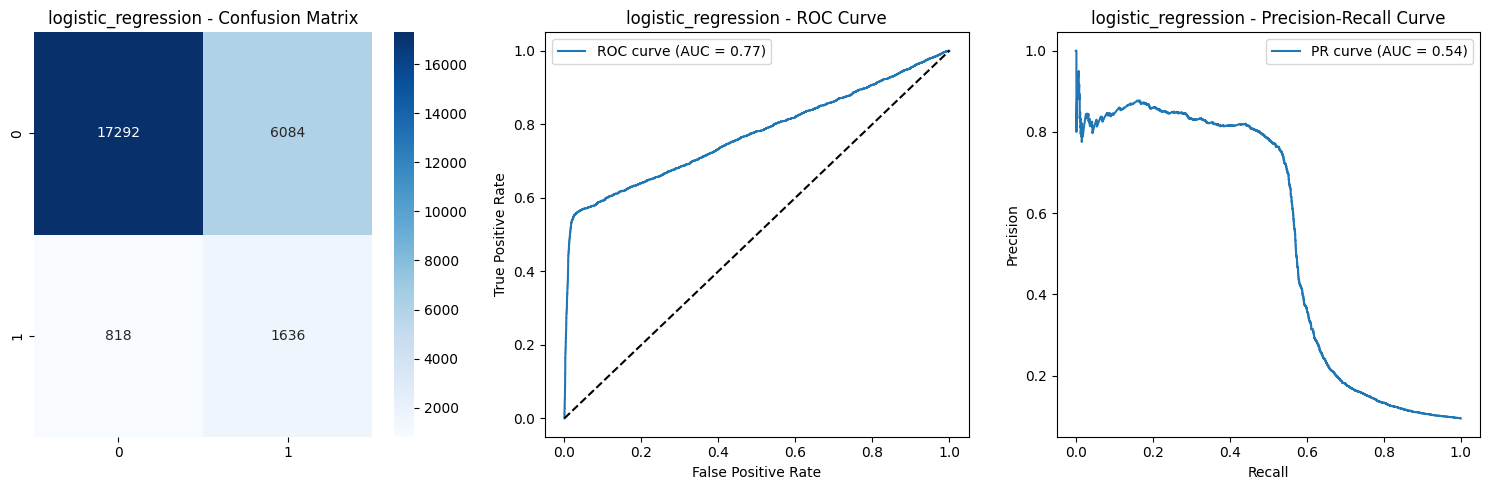

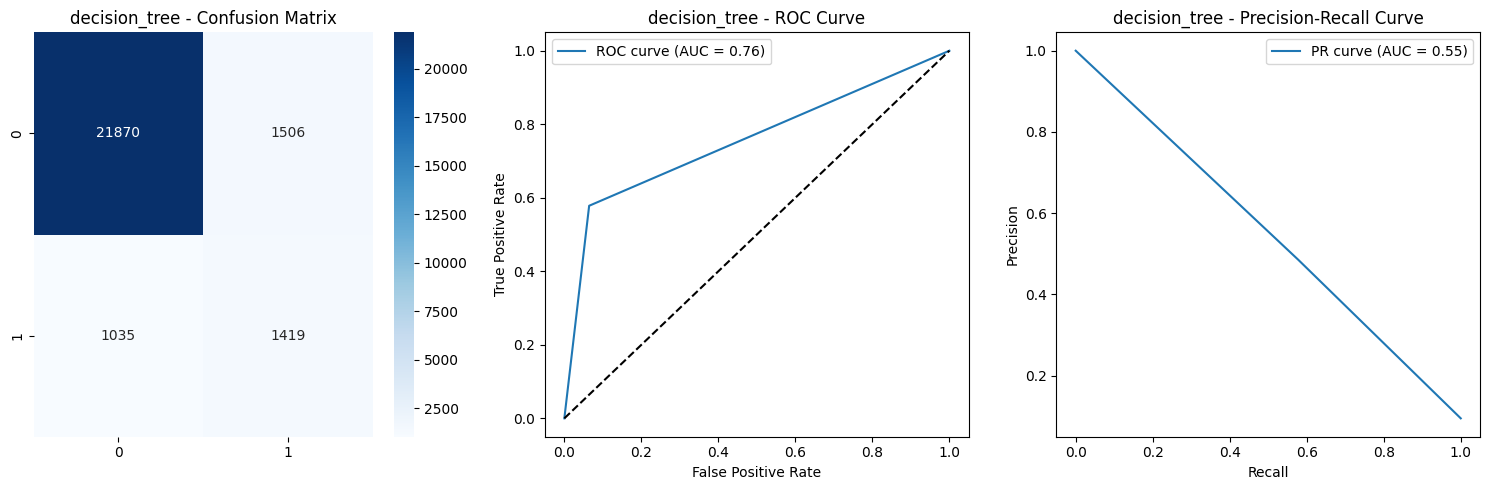

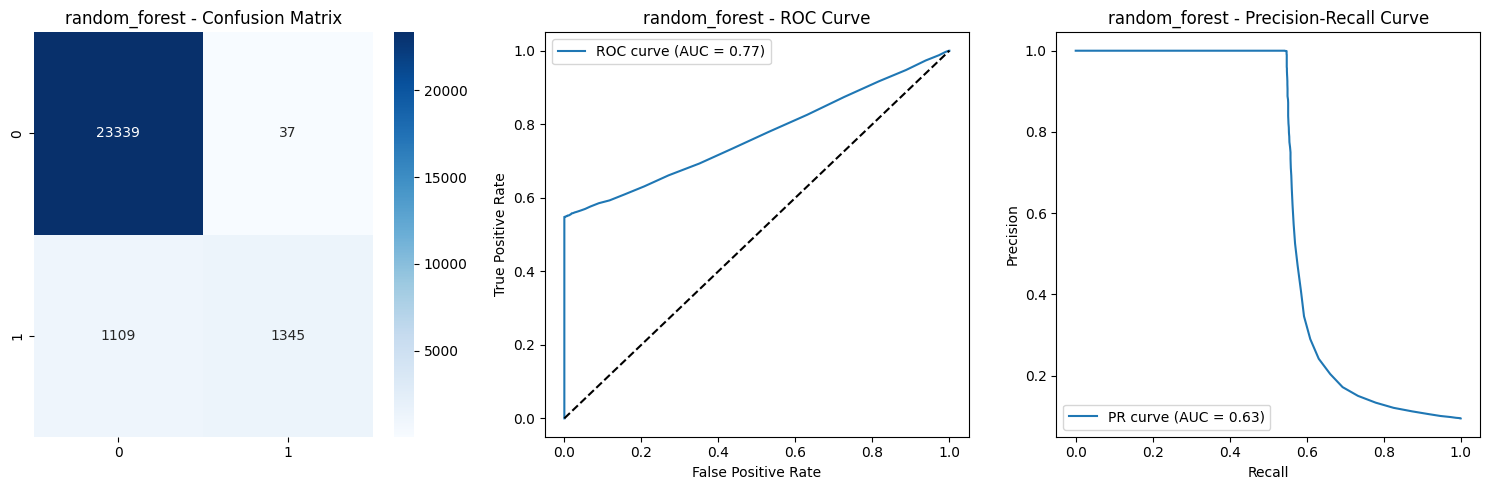

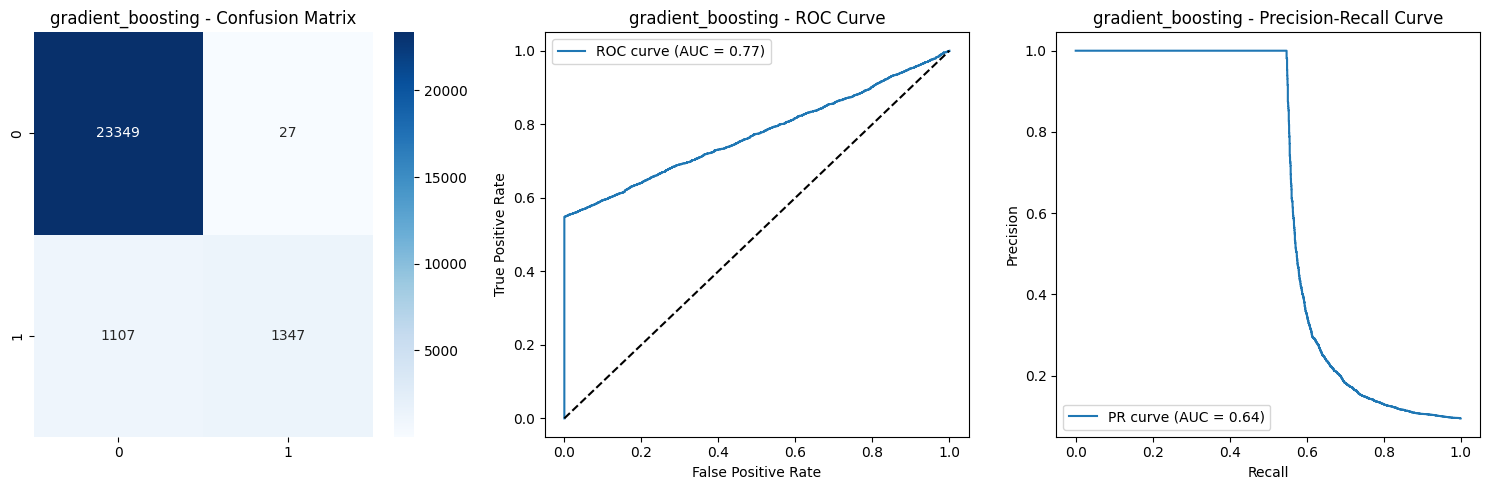

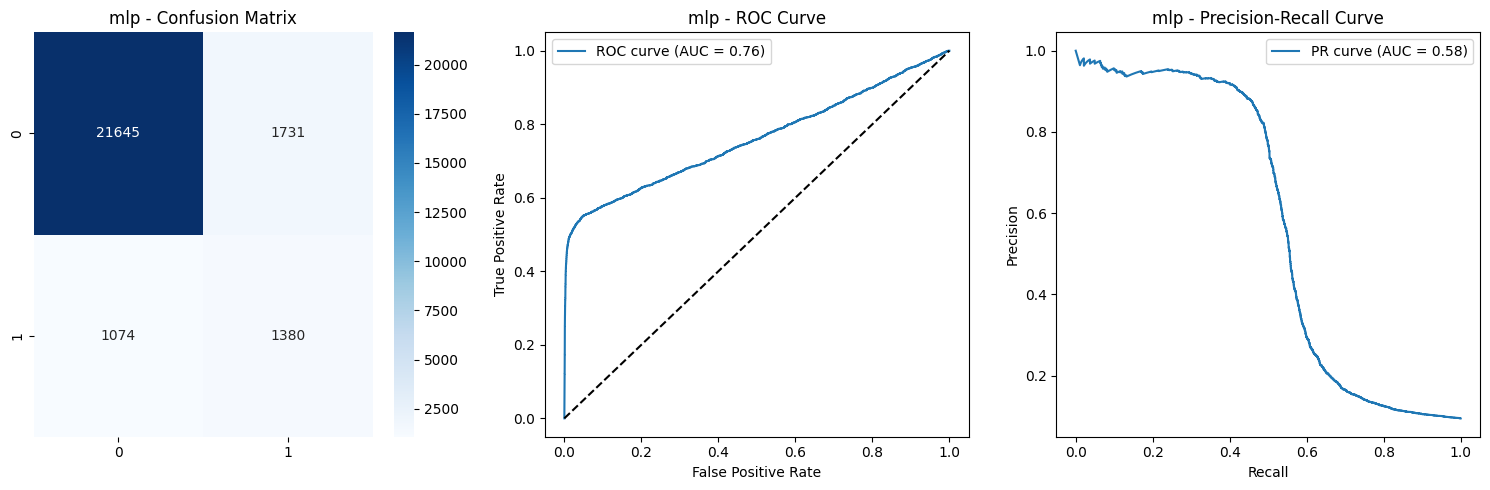

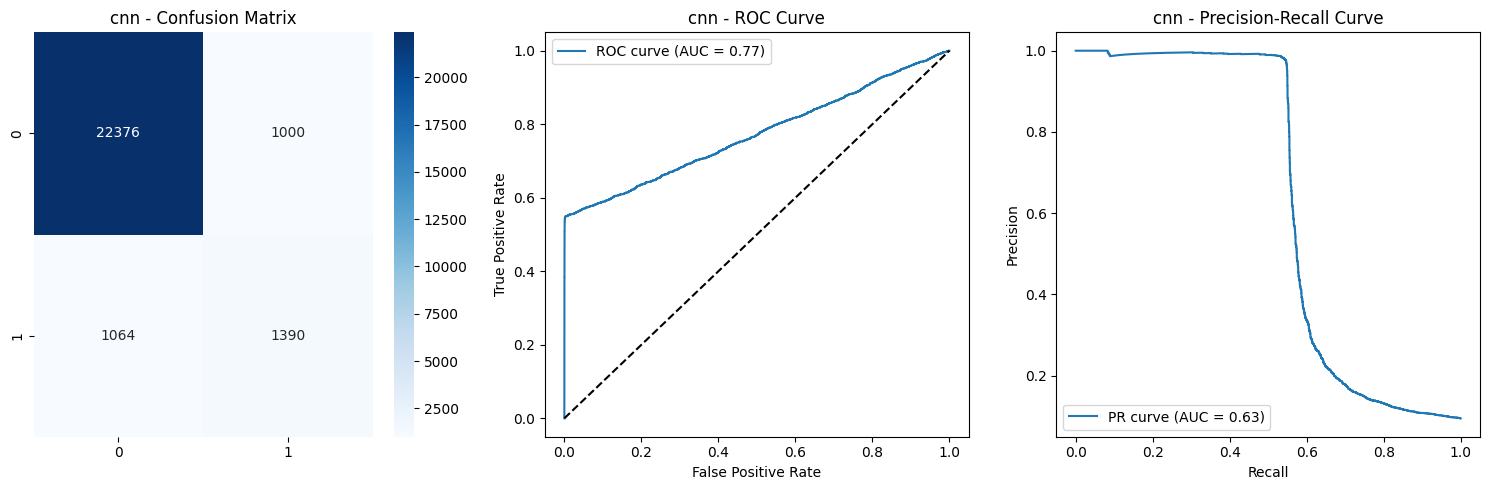

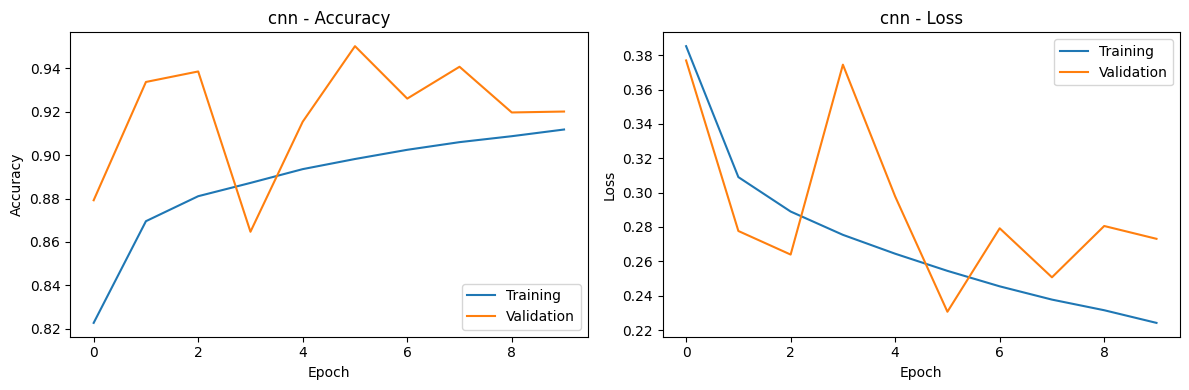

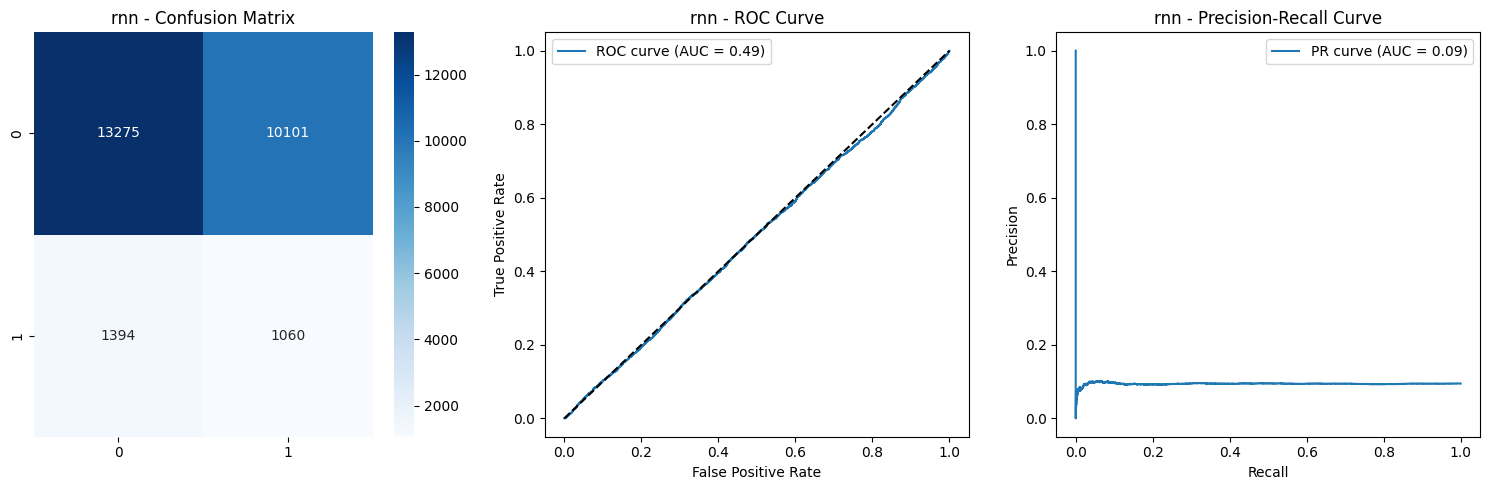

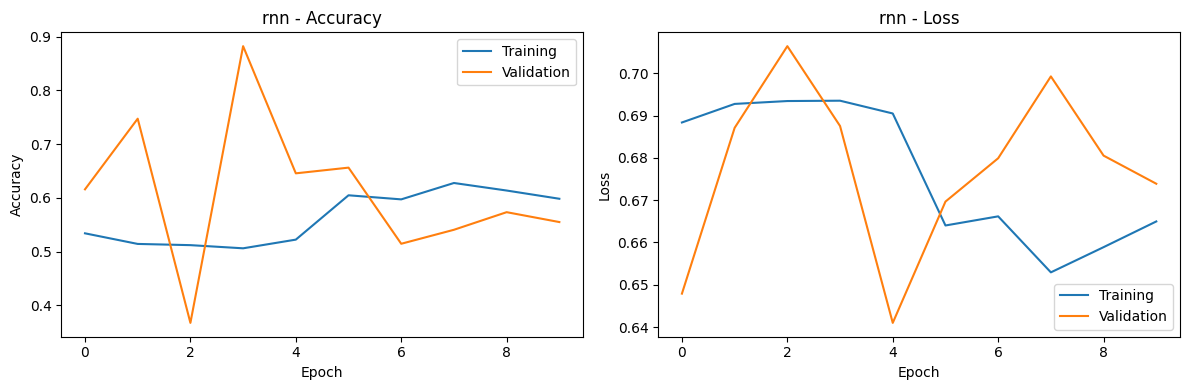

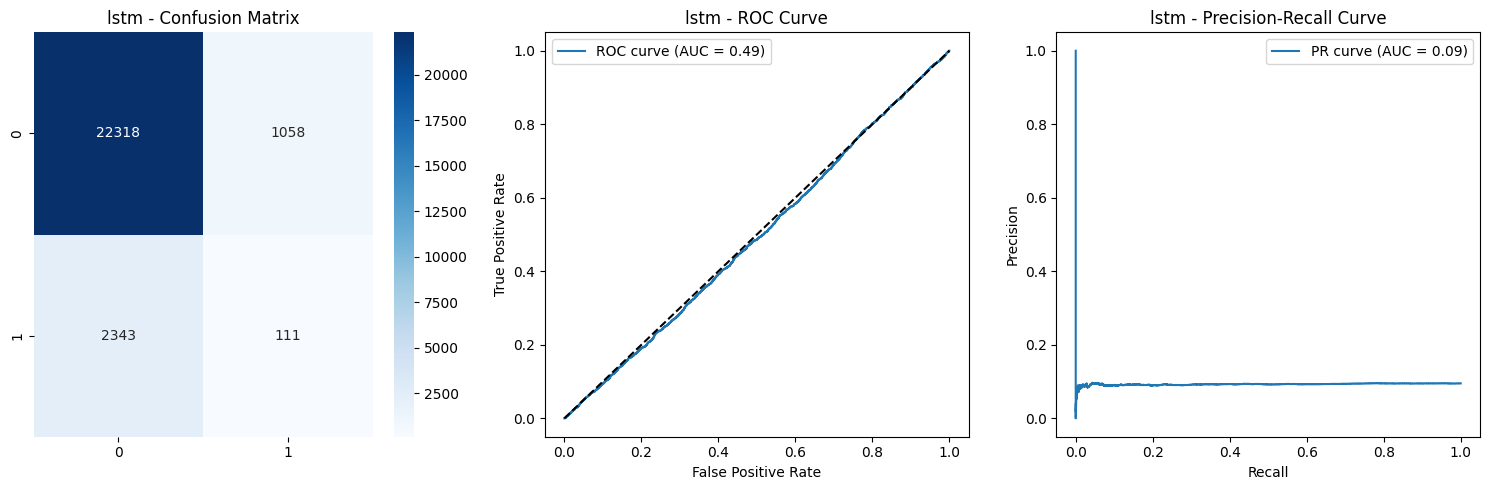

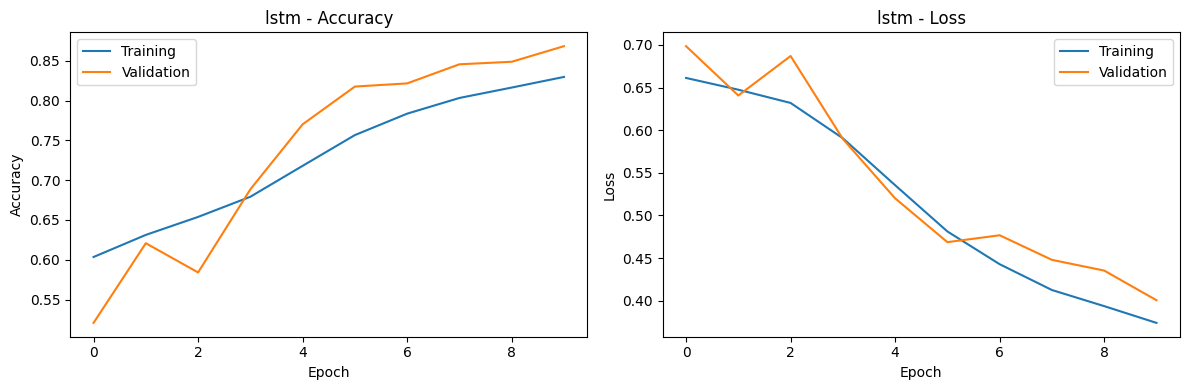

In [35]:
# Plot results for fraud_data models
print("\nE-commerce Fraud Detection Results:")
fraud_detector_ecommerce.plot_results()

### results for credit card fraud models 


Credit Card Fraud Detection Results:


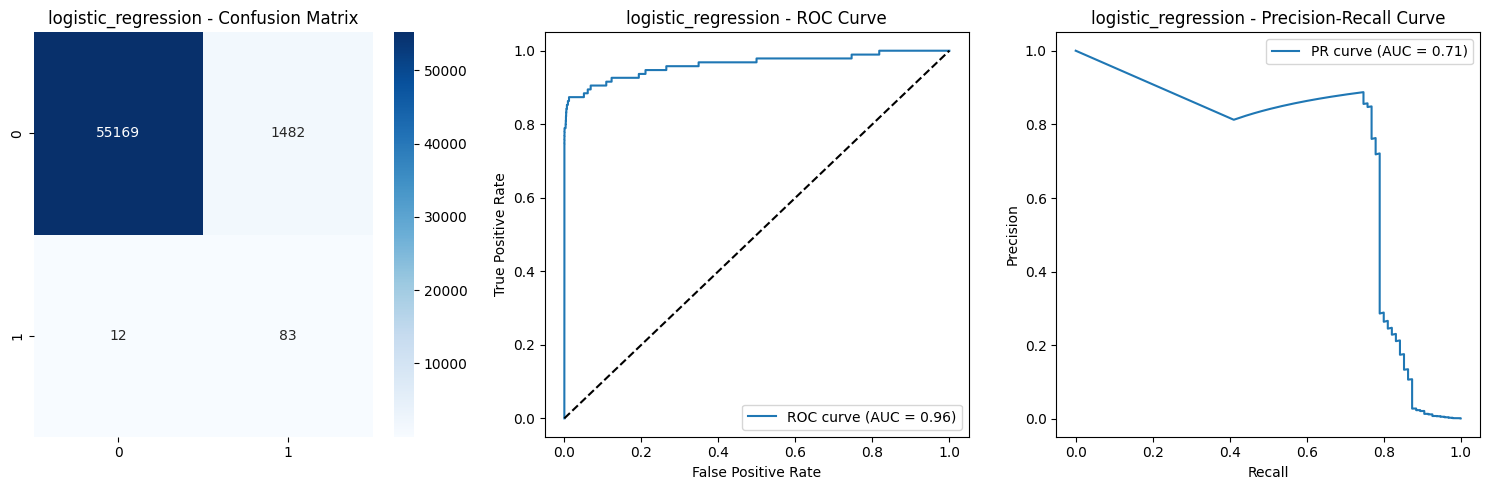

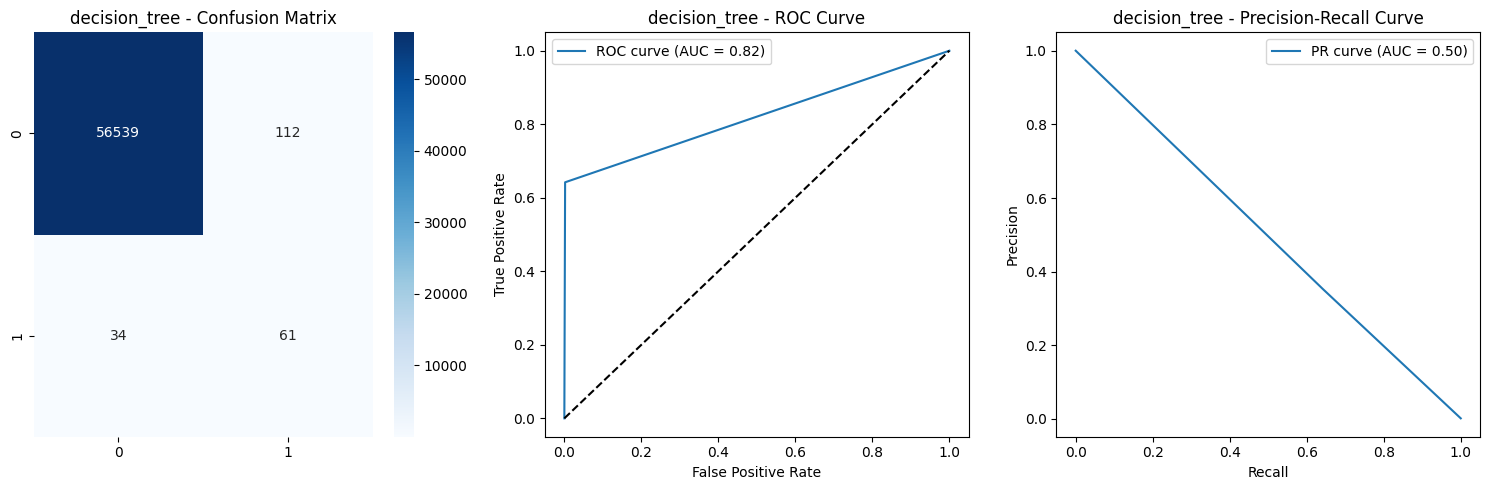

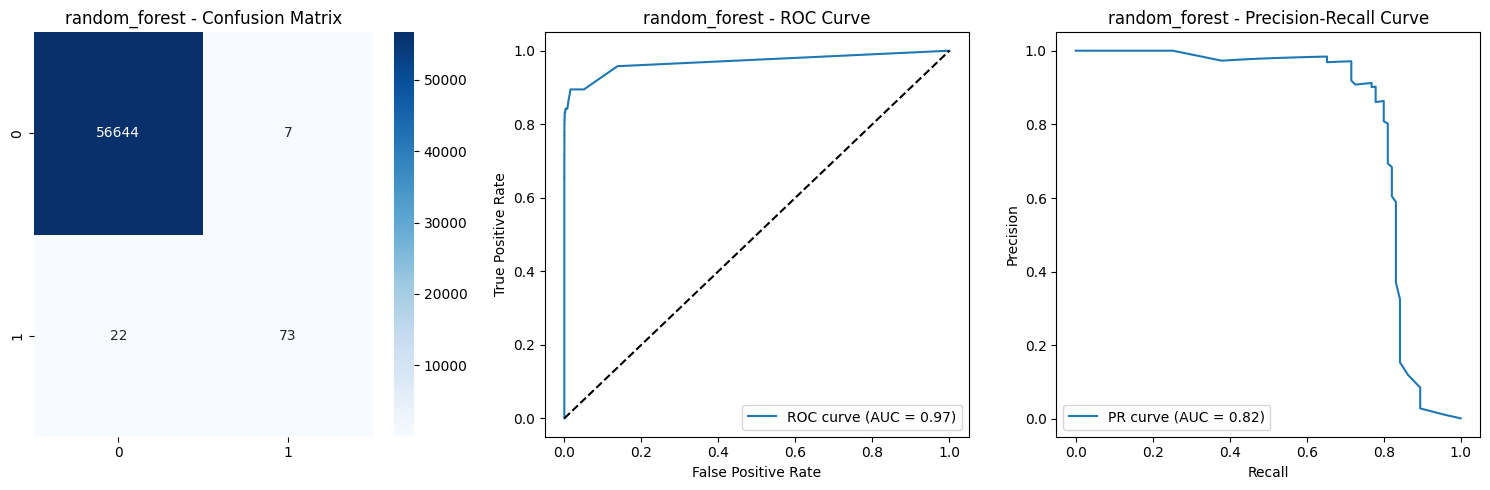

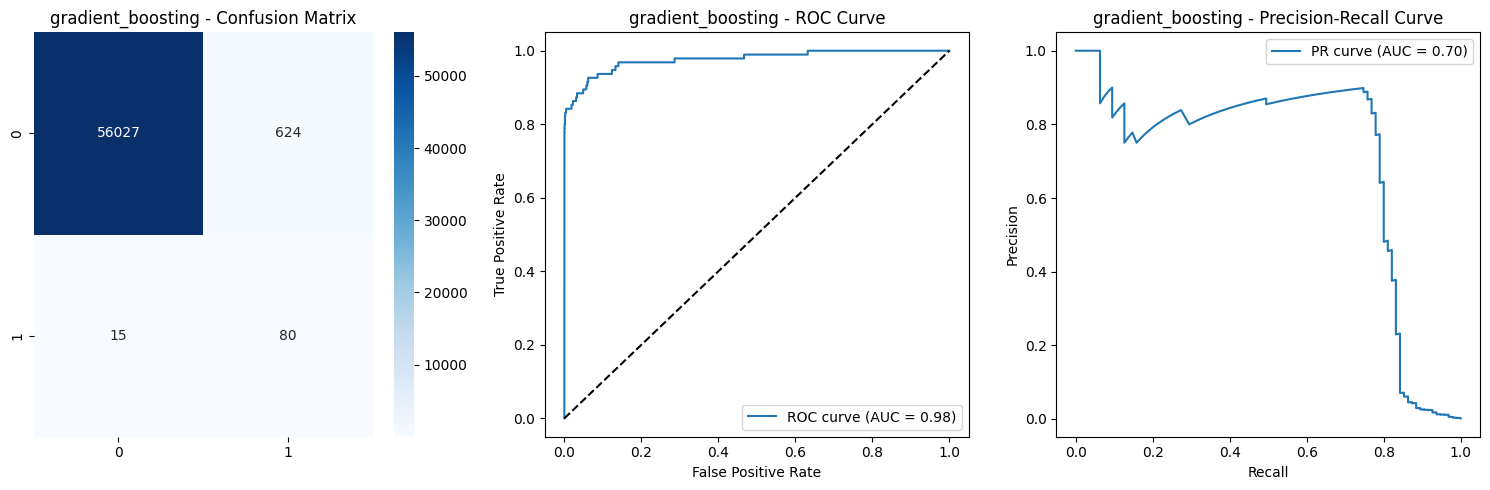

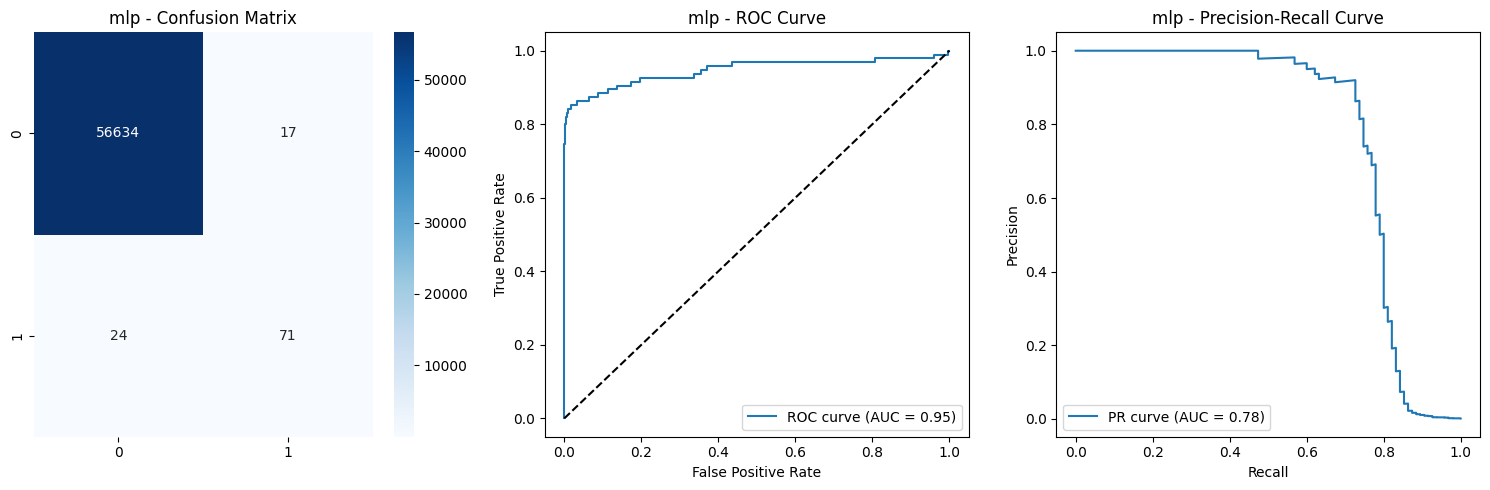

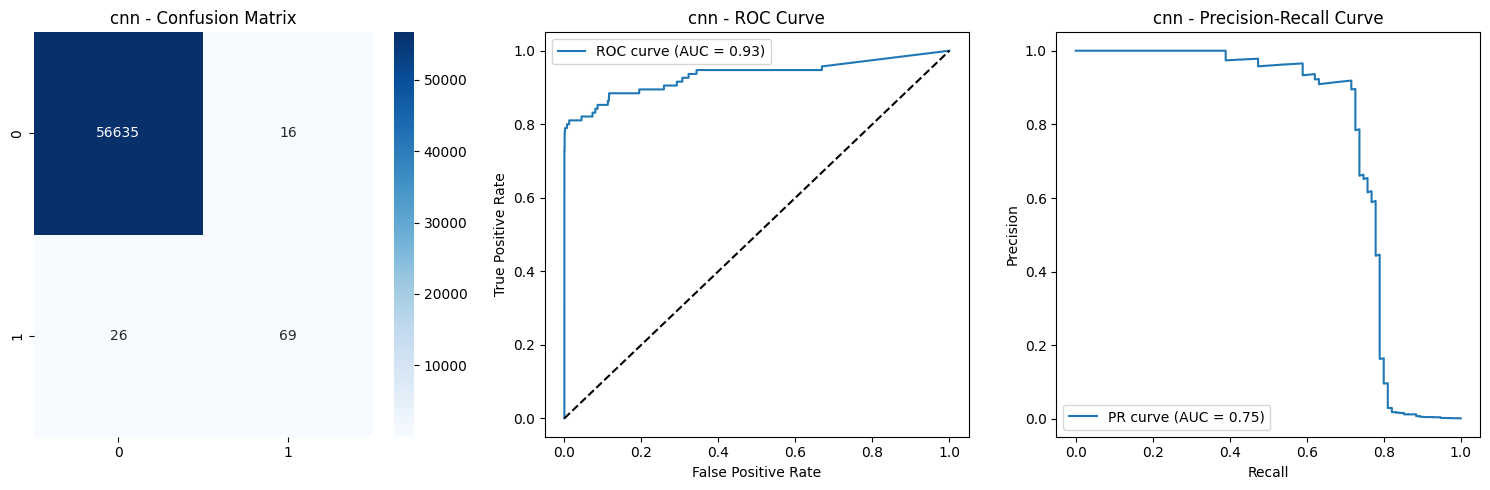

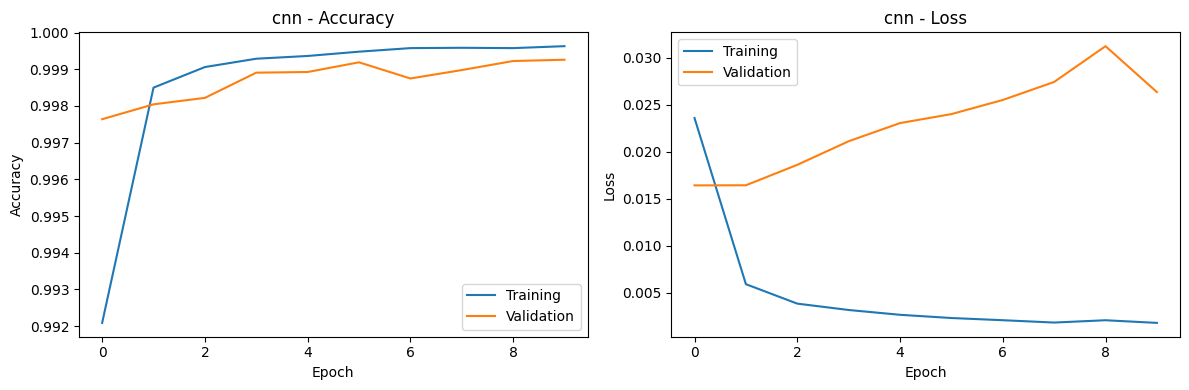

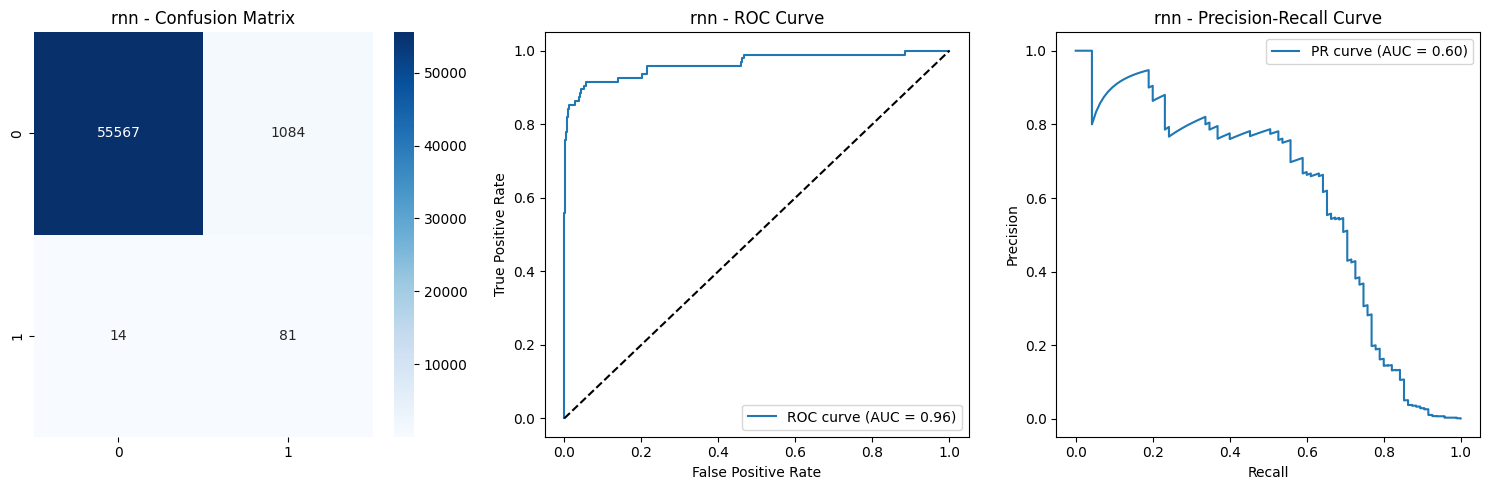

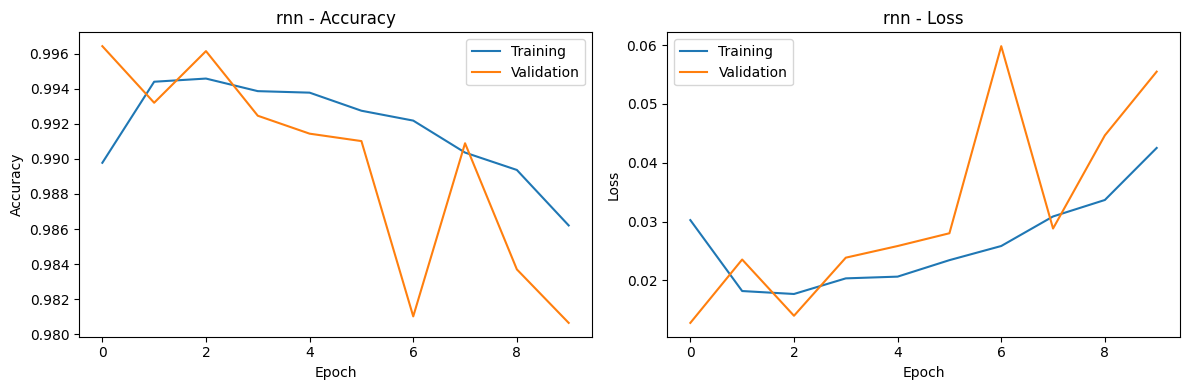

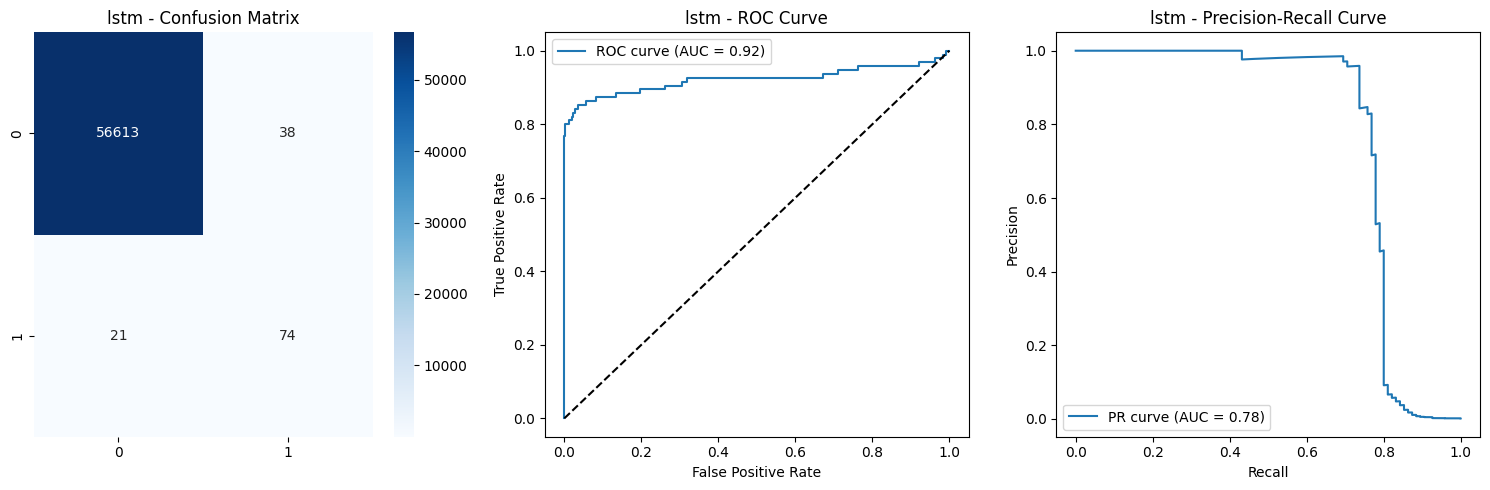

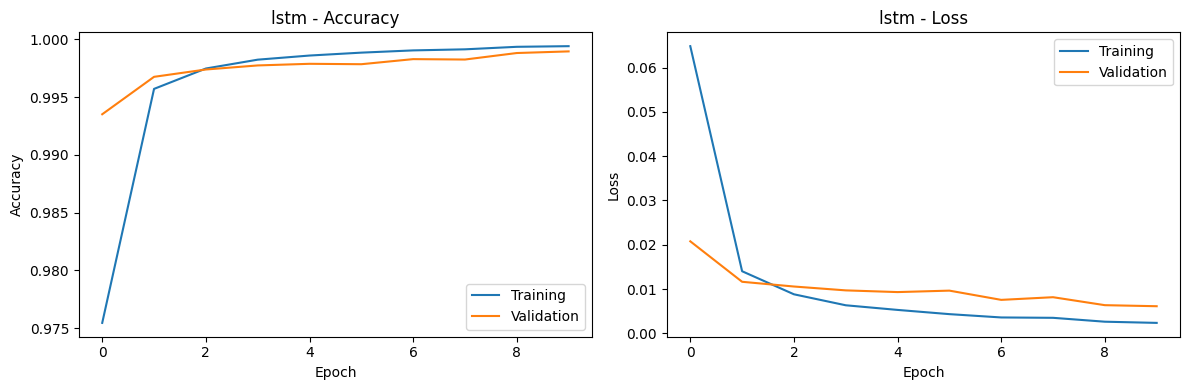

In [36]:
# Plot results for credit card fraud models
print("\nCredit Card Fraud Detection Results:")
fraud_detector_credit.plot_results()

## Compare model performances

In [68]:
# Compare model performances
def print_model_comparison(detector, dataset_name):
    print(f"\nModel Performance Comparison for {dataset_name}:")
    print("-" * 80)
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'AUC-ROC':<10}")
    print("-" * 80)
    
    for model_name, results in detector.results.items():
        if 'classification_report' in results:
            metrics = results['classification_report']
            auc_roc = results['roc_curve'][2]
            print(f"{model_name:<20} "
                  f"{metrics['accuracy']:<10.3f} "
                  f"{metrics['weighted avg']['precision']:<10.3f} "
                  f"{metrics['weighted avg']['recall']:<10.3f} "
                  f"{metrics['weighted avg']['f1-score']:<10.3f} "
                  f"{auc_roc:<10.3f}")

In [69]:
print("\nComparing model performances for E-commerce Fraud Detection")
print_model_comparison(fraud_detector_ecommerce, "E-commerce Fraud Detection")


Comparing model performances for E-commerce Fraud Detection

Model Performance Comparison for E-commerce Fraud Detection:
--------------------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score   AUC-ROC   
--------------------------------------------------------------------------------
logistic_regression  0.733      0.884      0.733      0.785      0.771     
decision_tree        0.902      0.910      0.902      0.905      0.757     
random_forest        0.956      0.956      0.956      0.950      0.768     
gradient_boosting    0.956      0.957      0.956      0.950      0.773     
mlp                  0.891      0.904      0.891      0.897      0.759     
cnn                  0.920      0.919      0.920      0.920      0.773     
rnn                  0.555      0.828      0.555      0.646      0.495     
lstm                 0.868      0.828      0.868      0.847      0.493     


In [70]:
print("\nComparing model performances for E-commerce Fraud Detection")
print_model_comparison(fraud_detector_credit, "Credit Card Fraud Detection")


Comparing model performances for E-commerce Fraud Detection

Model Performance Comparison for Credit Card Fraud Detection:
--------------------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score   AUC-ROC   
--------------------------------------------------------------------------------
logistic_regression  0.974      0.998      0.974      0.985      0.963     
decision_tree        0.997      0.998      0.997      0.998      0.820     
random_forest        0.999      0.999      0.999      0.999      0.969     
gradient_boosting    0.989      0.998      0.989      0.993      0.977     
mlp                  0.999      0.999      0.999      0.999      0.946     
cnn                  0.999      0.999      0.999      0.999      0.933     
rnn                  0.981      0.998      0.981      0.989      0.964     
lstm                 0.999      0.999      0.999      0.999      0.921     


In [71]:
# Save best models
print("\nSaving best models...")

def get_best_model(detector):
    best_f1 = 0
    best_model_name = None
    
    for model_name, results in detector.results.items():
        if 'classification_report' in results:
            f1 = results['classification_report']['weighted avg']['f1-score']
            if f1 > best_f1:
                best_f1 = f1
                best_model_name = model_name
    
    return best_model_name, detector.models[best_model_name]


Saving best models...


In [72]:
# save best models
with mlflow.start_run(run_name="best_models"):
    # Save best e-commerce fraud model
    best_ecommerce_model_name, best_ecommerce_model = get_best_model(fraud_detector_ecommerce)
    mlflow.sklearn.log_model(best_ecommerce_model, "best_ecommerce_fraud_model")
    print(f"\nBest model for E-commerce Fraud Detection: {best_ecommerce_model_name}")
    
    # Save best credit card fraud model
    best_credit_model_name, best_credit_model = get_best_model(fraud_detector_credit)
    mlflow.sklearn.log_model(best_credit_model, "best_credit_fraud_model")
    print(f"Best model for Credit Card Fraud Detection: {best_credit_model_name}")

print("\nModel training and evaluation completed!")

2024/10/27 22:03:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Best model for E-commerce Fraud Detection: gradient_boosting


2024/10/27 22:03:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best model for Credit Card Fraud Detection: random_forest

Model training and evaluation completed!


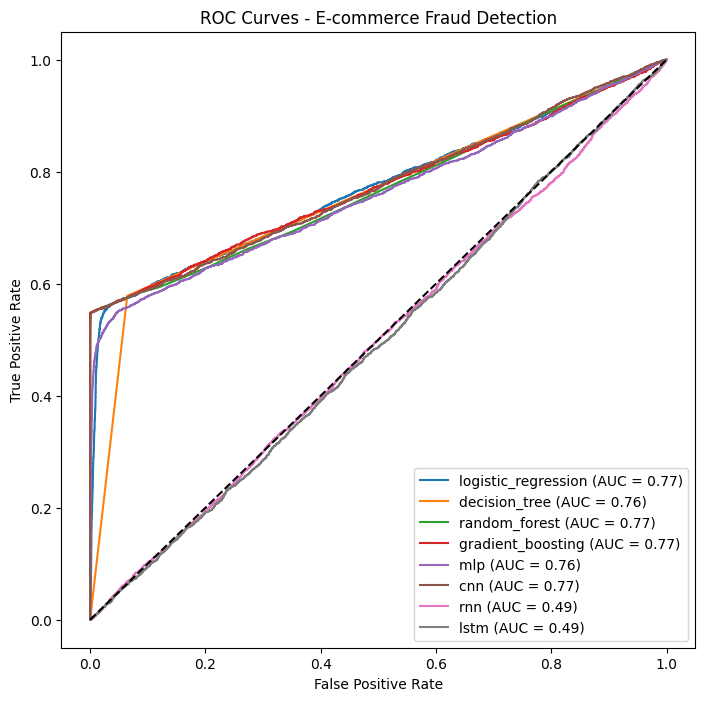

In [76]:
# Generate summary visualizations
plt.figure(figsize=(18, 8))

# ROC curves for all models (E-commerce)
plt.subplot(1, 2, 1)
for model_name, results in fraud_detector_ecommerce.results.items():
    if 'roc_curve' in results:
        fpr, tpr, auc_score = results['roc_curve']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - E-commerce Fraud Detection')
plt.legend()
plt.show()

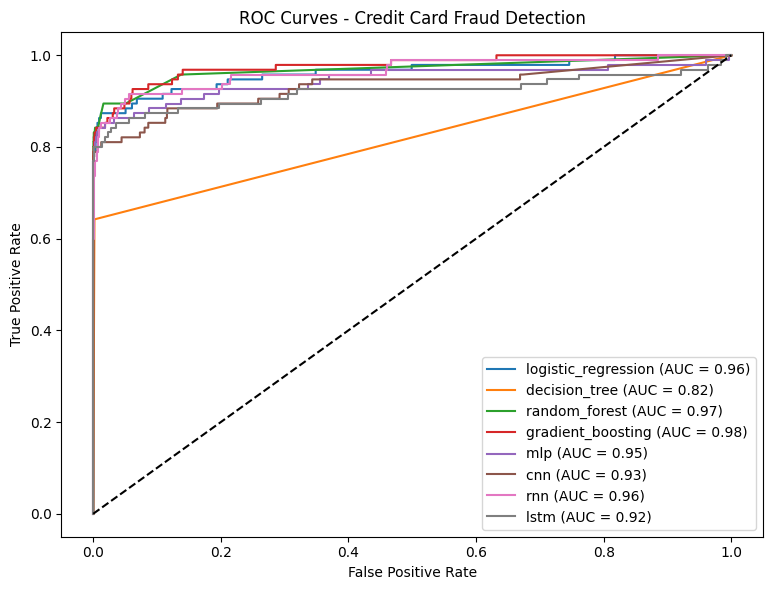

In [77]:
# ROC curves for all models (Credit Card)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
for model_name, results in fraud_detector_credit.results.items():
    if 'roc_curve' in results:
        fpr, tpr, auc_score = results['roc_curve']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Credit Card Fraud Detection')
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
# Save the models and scalers for later use
import joblib

# Save the best models and their corresponding scalers
joblib.dump(best_ecommerce_model, '../models/best_ecommerce_fraud_model.joblib')
joblib.dump(best_credit_model, '../models/best_credit_fraud_model.joblib')
joblib.dump(fraud_detector_ecommerce.scaler, '../models/ecommerce_scaler.joblib')
joblib.dump(fraud_detector_credit.scaler, '../models/credit_scaler.joblib')

print("\nBest models and scalers have been saved to disk!")


Best models and scalers have been saved to disk!


## Task 3 - Model Explainability
Model Explainability using SHAP and LIME for fraud detection models. 

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular

class ModelExplainer:
    def __init__(self, model, X_train, X_test, feature_names):
        """
        Initialize the ModelExplainer class
        
        Parameters:
        -----------
        model: trained model object
        X_train: training data
        X_test: test data
        feature_names: list of feature names
        """
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.feature_names = feature_names
        self.shap_values = None
        self.explainer = None
        
    def initialize_shap_explainer(self):
        """Initialize SHAP explainer based on model type"""
        try:
            # For tree-based models
            if hasattr(self.model, 'predict_proba') and hasattr(self.model, 'estimators_'):
                self.explainer = shap.TreeExplainer(self.model)
            # For other models
            else:
                self.explainer = shap.KernelExplainer(
                    self.model.predict_proba, 
                    shap.sample(self.X_train, 100)
                )
            print("SHAP explainer initialized successfully")
        except Exception as e:
            print(f"Error initializing SHAP explainer: {str(e)}")
            
    def calculate_shap_values(self):
        """Calculate SHAP values for the test set"""
        if self.explainer is None:
            self.initialize_shap_explainer()
        
        try:
            self.shap_values = self.explainer.shap_values(self.X_test)
            # If shap_values is a list (for binary classification), take the positive class
            if isinstance(self.shap_values, list):
                self.shap_values = self.shap_values[1]
            print("SHAP values calculated successfully")
        except Exception as e:
            print(f"Error calculating SHAP values: {str(e)}")
            
    def plot_shap_summary(self):
        """Create SHAP summary plot"""
        if self.shap_values is None:
            self.calculate_shap_values()
            
        plt.figure(figsize=(10, 8))
        shap.summary_plot(
            self.shap_values, 
            self.X_test,
            feature_names=self.feature_names,
            show=False
        )
        plt.title("SHAP Summary Plot")
        plt.tight_layout()
        plt.show()


    def plot_shap_dependence(self, feature_idx):
        """Create SHAP dependence plot for a specific feature"""
        if self.shap_values is None:
            self.calculate_shap_values()
            
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(
            feature_idx,
            self.shap_values,
            self.X_test,
            feature_names=self.feature_names,
            show=False
        )
        plt.title(f"SHAP Dependence Plot - {self.feature_names[feature_idx]}")
        plt.tight_layout()
        plt.show()
        
    def plot_shap_force(self, instance_index):
        """Create SHAP force plot for a specific instance"""
        if self.shap_values is None:
            self.calculate_shap_values()
            
        plt.figure(figsize=(15, 3))
        shap.force_plot(
            self.explainer.expected_value,
            self.shap_values[instance_index],
            self.X_test.iloc[instance_index],
            feature_names=self.feature_names,
            matplotlib=True,
            show=False
        )
        plt.title(f"SHAP Force Plot - Instance {instance_index}")
        plt.tight_layout()
        plt.show()
        
    def initialize_lime_explainer(self):
        """Initialize LIME explainer"""
        try:
            self.lime_explainer = lime.lime_tabular.LimeTabularExplainer(
               self.X_train.values if isinstance(self.X_train, pd.DataFrame) else self.X_train,
                feature_names=self.feature_names,
                class_names=['Not Fraud', 'Fraud'],
                mode='classification'
            )

            
            print("LIME explainer initialized successfully")
        except Exception as e:
            print(f"Error initializing LIME explainer: {str(e)}")
            
    def explain_instance_lime(self, instance_index, num_features=10):
        """
        Create LIME explanation for a specific instance
        
        Parameters:
        -----------
        instance_index: index of the instance to explain
        num_features: number of features to include in the explanation
        """
        if not hasattr(self, 'lime_explainer'):
            self.initialize_lime_explainer()
            
        try:
            explanation = self.lime_explainer.explain_instance(
                self.X_test.iloc[instance_index].values,
                self.model.predict_proba,
                num_features=num_features
            )
            
            # Plot the explanation
            plt.figure(figsize=(10, 6))
            explanation.as_pyplot_figure()
            plt.title(f"LIME Explanation - Instance {instance_index}")
            plt.tight_layout()
            plt.show()
            
            return explanation
        except Exception as e:
            print(f"Error generating LIME explanation: {str(e)}")   

In [127]:
# Initialize explainers
ecommerce_explainer = ModelExplainer(
        best_ecommerce_model,
        X_fraud.iloc[:-100],  # Use part of data for training
        X_fraud.iloc[-100:],  # Use last 100 samples for testing
        X_fraud.columns.tolist()
    )
    
credit_explainer = ModelExplainer(
        best_credit_model,
        X_credit.iloc[:-100],
        X_credit.iloc[-100:],
        X_credit.columns.tolist()
    )

### Generate SHAP explanations


Generating SHAP explanations for E-commerce fraud model...
SHAP explainer initialized successfully
SHAP values calculated successfully


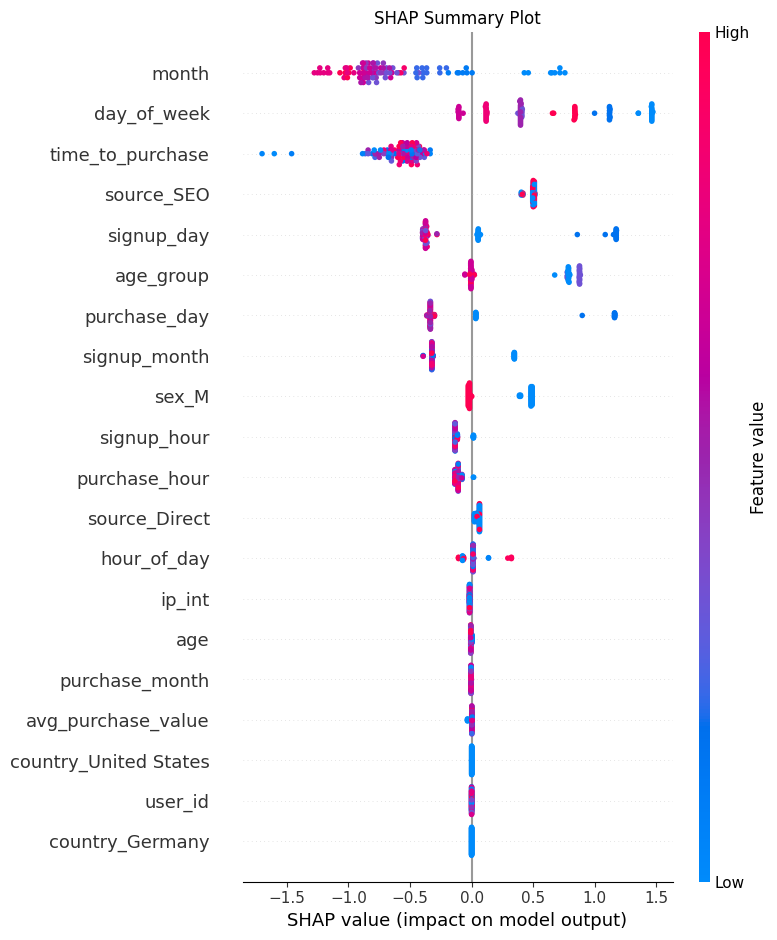

<Figure size 1000x600 with 0 Axes>

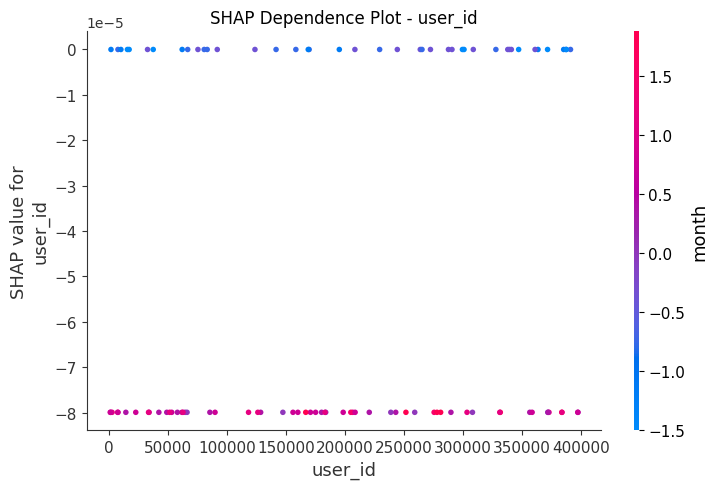

<Figure size 1500x300 with 0 Axes>

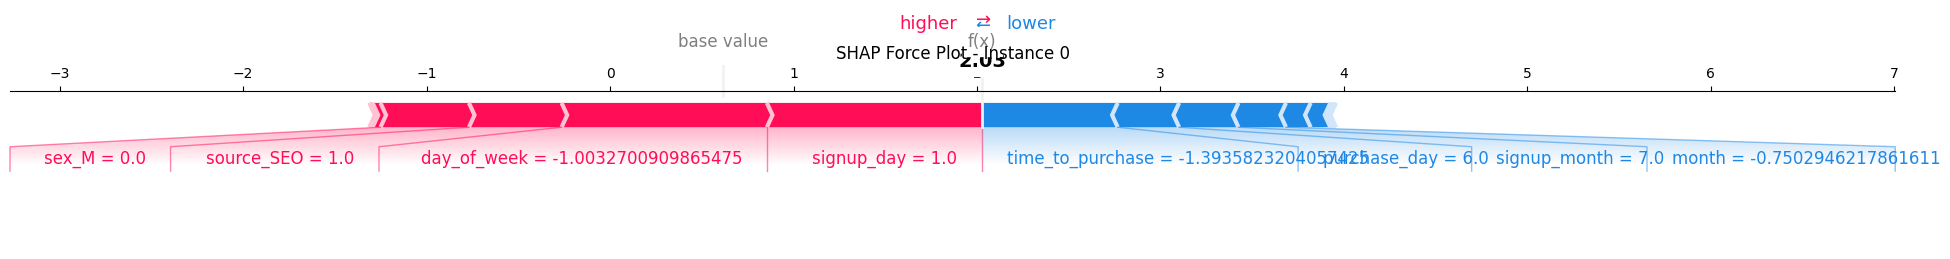

In [128]:
print("\nGenerating SHAP explanations for E-commerce fraud model...")
ecommerce_explainer.plot_shap_summary()
ecommerce_explainer.plot_shap_dependence(0)  # Explain first feature
ecommerce_explainer.plot_shap_force(0)  # Explain first instance

In [ ]:
print("\nGenerating SHAP explanations for Credit card fraud model...")
credit_explainer.plot_shap_summary()
credit_explainer.plot_shap_dependence(0)
credit_explainer.plot_shap_force(0)

### Generate LIME explanations


Generating LIME explanations for E-commerce fraud model...
LIME explainer initialized successfully


<Figure size 1000x600 with 0 Axes>

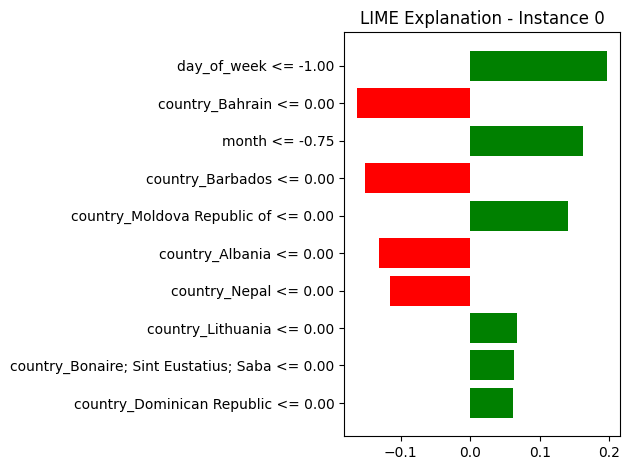

<Figure size 1000x600 with 0 Axes>

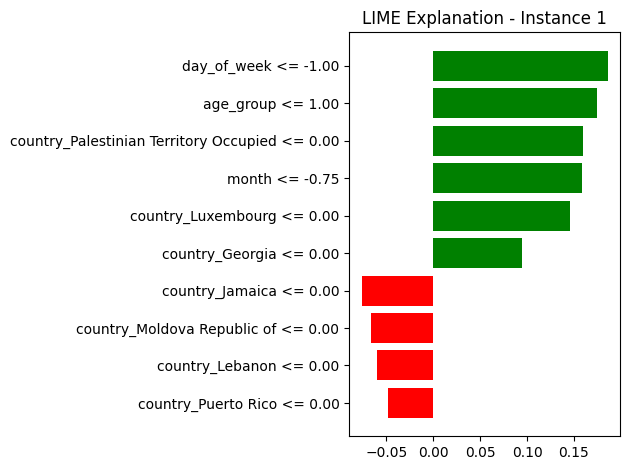

In [129]:
print("\nGenerating LIME explanations for E-commerce fraud model...")
ecommerce_explainer.explain_instance_lime(0)
ecommerce_explainer.explain_instance_lime(1)


Generating LIME explanations for Credit card fraud model...
LIME explainer initialized successfully


<Figure size 1000x600 with 0 Axes>

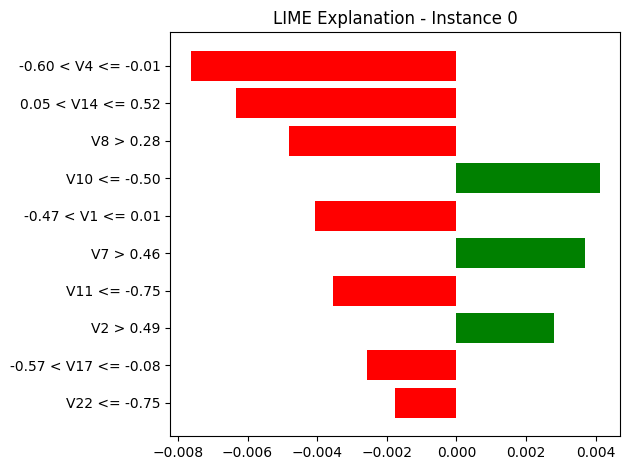

<Figure size 1000x600 with 0 Axes>

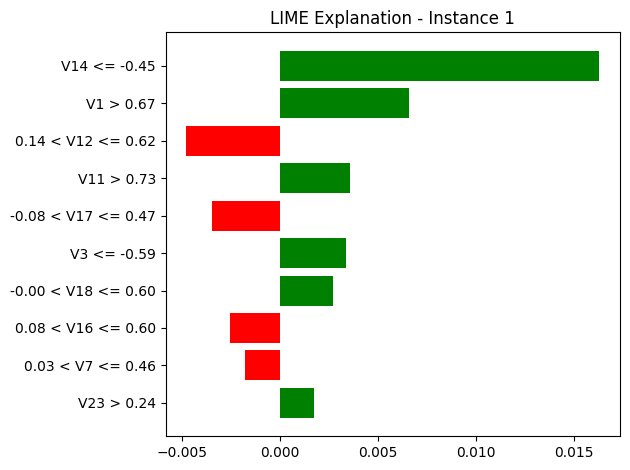

In [130]:
print("\nGenerating LIME explanations for Credit card fraud model...")
credit_explainer.explain_instance_lime(0)
credit_explainer.explain_instance_lime(1)